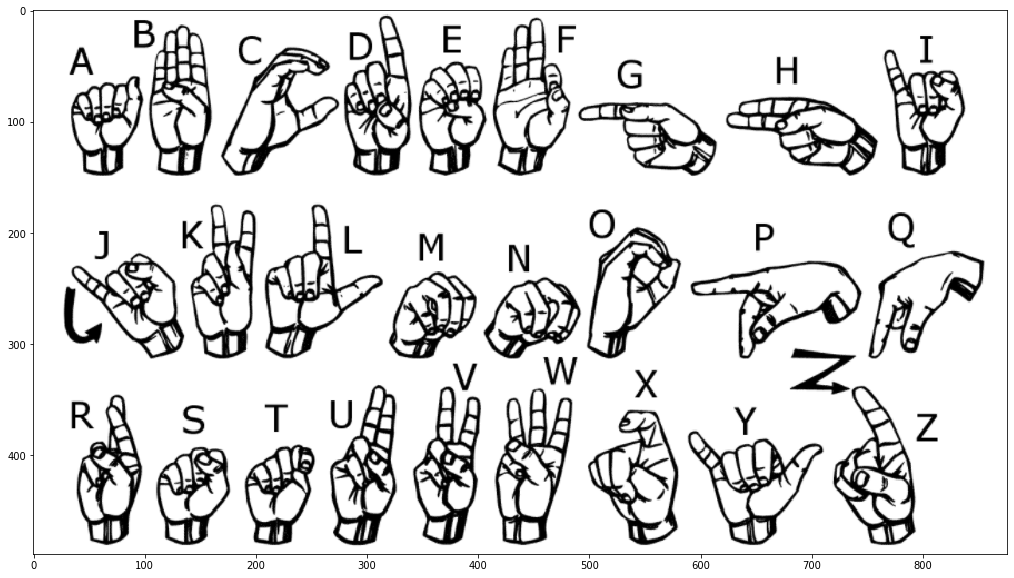

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

plt.figure(figsize = (20, 10))

img_title = mpimg.imread('Sign Language MNIST/american_sign_language.PNG')
plt.imshow(img_title)

# Summary
## Data URL: https://www.kaggle.com/datamunge/sign-language-mnist
The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity. The modification and expansion strategy was filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees rotation. Because of the tiny size of the images, these modifications effectively alter the resolution and class separation in interesting, controllable ways.

This dataset was inspired by the Fashion-MNIST 2 and the machine learning pipeline for gestures by Sreehari 4.

A robust visual recognition algorithm could provide not only new benchmarks that challenge modern machine learning methods such as Convolutional Neural Nets but also could pragmatically help the deaf and hard-of-hearing better communicate using computer vision applications. The National Institute on Deafness and other Communications Disorders (NIDCD) indicates that the 200-year-old American Sign Language is a complete, complex language (of which letter gestures are only part) but is the primary language for many deaf North Americans. ASL is the leading minority language in the U.S. after the "big four": Spanish, Italian, German, and French. One could implement computer vision in an inexpensive board computer like Raspberry Pi with OpenCV, and some Text-to-Speech to enabling improved and automated translation applications.

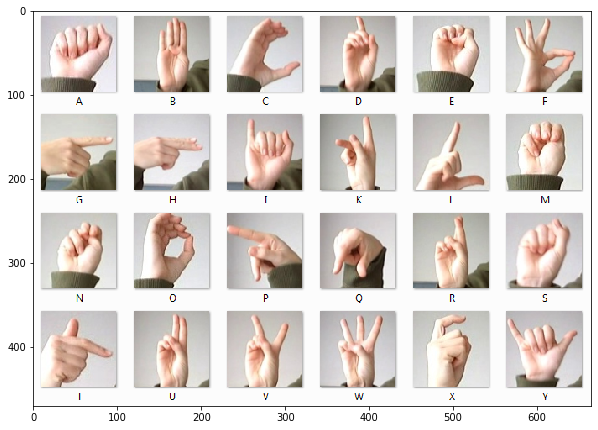

In [2]:
plt.figure(figsize = (10, 10))

img_template = mpimg.imread('Sign Language MNIST/amer_sign2.PNG')
plt.imshow(img_template)

In [3]:
# Locate the data, and perform data wrangling
import pandas as df

# Check the train data
train_data = 'Sign Language MNIST/sign_mnist_train/sign_mnist_train.csv'
df_train = df.read_csv(train_data)

# Check the data shape
print(df_train.shape)

# Print top 10 data
df_train.head(10)

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [4]:
# Check the test data
test_data = 'Sign Language MNIST/sign_mnist_test/sign_mnist_test.csv'
df_test = df.read_csv(test_data )

# Check the data shape
print(df_test.shape)

# Print top 10 data
df_test.head(10)

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [5]:
# Assign train labels
train_labels = df_train['label']

In [6]:
print(type(train_labels))
print(train_labels.shape)
print(train_labels[:10])

<class 'pandas.core.series.Series'>
(27455,)
0     3
1     6
2     2
3     2
4    13
5    16
6     8
7    22
8     3
9     3
Name: label, dtype: int64


In [7]:
# Assign train images
train_images = df_train.iloc[:, 1:]

In [8]:
print(type(train_images))
print(train_images.shape)
print(train_images[:10])

<class 'pandas.core.frame.DataFrame'>
(27455, 784)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     107     118     127     134     139     143     146     150     153   
1     155     157     156     156     156     157     156     158     158   
2     187     188     188     187     187     186     187     188     187   
3     211     211     212     212     211     210     211     210     210   
4     164     167     170     172     176     179     180     184     185   
5     161     168     172     173     178     184     189     193     196   
6     134     134     135     135     136     137     137     138     138   
7     114      42      74      99     104     109     117     127     142   
8     169     174     176     180     183     185     187     188     190   
9     189     189     189     190     190     191     190     190     190   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      156  ...       

Let's play and visualize the first data

In [9]:
import numpy as np

# temp=np.loadtxt("file.csv",dtype=np.int,delimiter=',')

train_numpy = train_images.to_numpy()

In [10]:
print(type(train_numpy))
print(train_numpy[0])

<class 'numpy.ndarray'>
[107 118 127 134 139 143 146 150 153 156 158 160 163 165 159 166 168 170
 170 171 171 171 172 171 171 170 170 169 111 121 129 135 141 144 148 151
 154 157 160 163 164 170 119 152 171 171 170 171 172 172 172 172 172 171
 171 170 113 123 131 137 142 145 150 152 155 158 161 163 164 172 105 142
 170 171 171 171 172 172 173 173 172 171 171 171 116 125 133 139 143 146
 151 153 156 159 162 163 167 167  95 144 171 172 172 172 172 172 173 173
 173 172 172 171 117 126 134 140 145 149 153 156 158 161 163 164 175 156
  87 154 172 173 173 173 173 173 174 174 174 173 172 172 119 128 136 142
 146 150 153 156 159 163 165 164 184 148  89 164 172 174 174 174 174 175
 175 174 175 174 173 173 122 130 138 143 147 150 154 158 162 165 166 172
 181 128  94 170 173 175 174 175 176 177 177 177 177 175 175 174 122 132
 139 145 149 152 156 160 163 165 166 181 172 103 113 175 176 178 178 179
 179 179 179 178 179 177 175 174 125 134 141 147 150 153 157 161 164 167
 168 184 179 116 126 165 17

In [11]:
reshaped_train = train_numpy.reshape((27455, 28, 28))

In [12]:
print(reshaped_train.shape)

(27455, 28, 28)


[[107 118 127 134 139 143 146 150 153 156 158 160 163 165 159 166 168 170
  170 171 171 171 172 171 171 170 170 169]
 [111 121 129 135 141 144 148 151 154 157 160 163 164 170 119 152 171 171
  170 171 172 172 172 172 172 171 171 170]
 [113 123 131 137 142 145 150 152 155 158 161 163 164 172 105 142 170 171
  171 171 172 172 173 173 172 171 171 171]
 [116 125 133 139 143 146 151 153 156 159 162 163 167 167  95 144 171 172
  172 172 172 172 173 173 173 172 172 171]
 [117 126 134 140 145 149 153 156 158 161 163 164 175 156  87 154 172 173
  173 173 173 173 174 174 174 173 172 172]
 [119 128 136 142 146 150 153 156 159 163 165 164 184 148  89 164 172 174
  174 174 174 175 175 174 175 174 173 173]
 [122 130 138 143 147 150 154 158 162 165 166 172 181 128  94 170 173 175
  174 175 176 177 177 177 177 175 175 174]
 [122 132 139 145 149 152 156 160 163 165 166 181 172 103 113 175 176 178
  178 179 179 179 179 178 179 177 175 174]
 [125 134 141 147 150 153 157 161 164 167 168 184 179 116 126 16

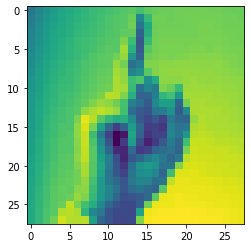

In [13]:
print(reshaped_train[0])
plt.imshow(reshaped_train[0])

[[155 157 156 156 156 157 156 158 158 157 158 156 154 154 153 152 151 149
  149 148 147 146 144 142 143 138  92 108]
 [158 159 159 159 160 160 160 160 160 160 160 159 158 157 155 154 153 152
  151 150 149 149 147 147 146 142 116 143]
 [161 161 161 161 162 161 162 162 162 162 161 161 161 160 159 158 156 155
  154 153 152 152 151 150 147 147 125 140]
 [165 164 164 165 165 165 165 165 164 164 164 165 163 163 162 161 159 159
  158 156 156 155 152 153 154 151 124 126]
 [166 167 166 167 167 166 167 167 167 167 166 167 165 165 164 163 162 162
  161 160 156 151 154 176 145 122 144 100]
 [168 169 168 169 169 168 169 170 170 170 169 168 167 166 167 165 162 159
  159 156 151 165 171 146  94 130 159 111]
 [171 171 170 171 171 171 172 171 171 171 172 169 169 170 166 165 160 157
  170 177 171 153 124  96 125 157 155 146]
 [172 172 172 173 173 173 173 173 173 173 174 174 171 167 169 175 171 164
  165 157 129 112 121 148 164 158 155 152]
 [175 174 174 174 175 174 174 174 174 177 178 174 170 178 182 17

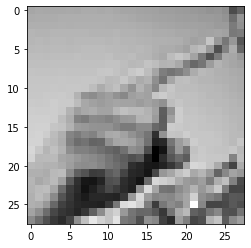

In [14]:
print(reshaped_train[1])
plt.imshow(reshaped_train[1], cmap='gray')

What are our train labels?

In [15]:
print(type(train_labels))

<class 'pandas.core.series.Series'>


In [16]:
train_label_numpy = train_labels.to_numpy()

In [17]:
print(type(train_label_numpy))

<class 'numpy.ndarray'>


Great!

## Visualize the Sign Language MNIST

In [18]:
# Check top 100 labels..
print(train_label_numpy[:100])

[ 3  6  2  2 13 16  8 22  3  3 18 10 16 22 20 16 17 13 13 19 18 21 16 23
  3 23 24 18 22  1  1 12  2  6  2 12 23  2  3 13 11 15 20  2  4 10  0 19
  5  7  0 11  6 21 18 19 21  7  0  0  4 14 15 10  5 19  2 13  7 16 12  8
 15 11 21 14 10  6 18 11 16 14 16 18  4  2 16 14 23  0 21 16 10 14 17  1
 15 18  4 16]


In [41]:
print(np.unique(train_label_numpy))
print("")

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]



In [42]:
# Transfer top 100 elements to list
my_list = train_label_numpy[:100].tolist()

# Print it out
print(my_list)

[3, 6, 2, 2, 13, 16, 8, 22, 3, 3, 18, 10, 16, 22, 20, 16, 17, 13, 13, 19, 18, 21, 16, 23, 3, 23, 24, 18, 22, 1, 1, 12, 2, 6, 2, 12, 23, 2, 3, 13, 11, 15, 20, 2, 4, 10, 0, 19, 5, 7, 0, 11, 6, 21, 18, 19, 21, 7, 0, 0, 4, 14, 15, 10, 5, 19, 2, 13, 7, 16, 12, 8, 15, 11, 21, 14, 10, 6, 18, 11, 16, 14, 16, 18, 4, 2, 16, 14, 23, 0, 21, 16, 10, 14, 17, 1, 15, 18, 4, 16]


In [48]:
# Cerating plotting index
my_index = []

# Iterate my_list to find out the first unique index of the sign language label
# Note that there are no cases for 9=J or 25=Z because of gesture motions
for i in range(0,25):
    if i == 9:
        continue
    my_index.append(my_list.index(i))
    
# Print it 
print(my_index)

# Confirrm the length of my_index
print(len(my_index))

[46, 29, 2, 0, 44, 48, 1, 49, 6, 11, 40, 31, 4, 61, 41, 5, 16, 10, 19, 14, 21, 7, 23, 26]
24


In [51]:
label_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R ', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

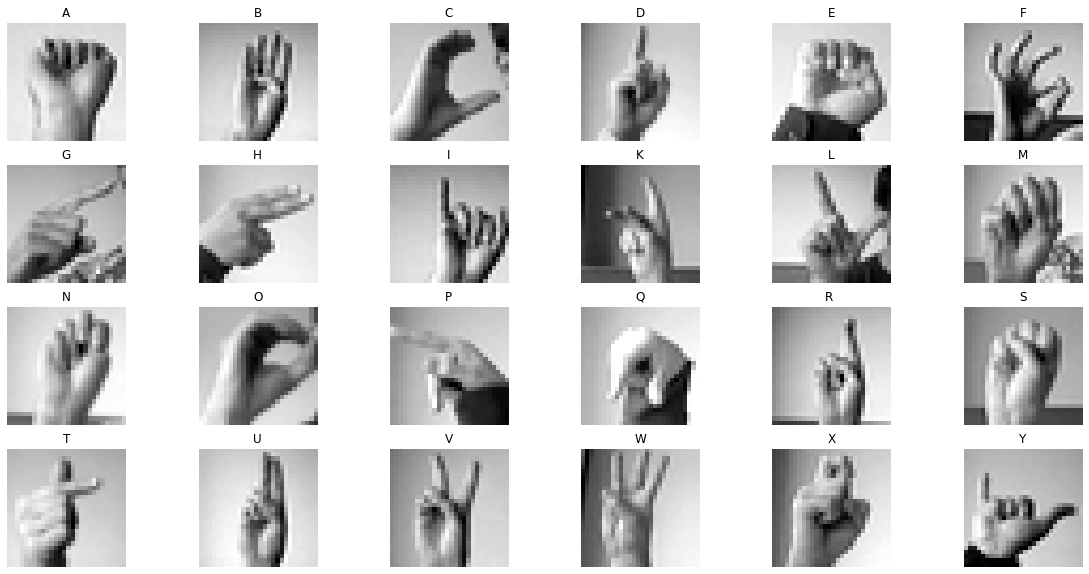

In [53]:
# Let's visualize Sign Language MNIST
fig=plt.figure(figsize=(20, 10))

for i , j in enumerate(my_index):
    ax = fig.add_subplot(4, 6, i+1)
    ax.axis('Off')
    ax.set_title(label_list[i])
    ax.imshow(reshaped_train[j], cmap='gray')

plt.show()

## Training the Sign Language MNIST

In [54]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [20]:
# Construct CNN 
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(26, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1

In [21]:
# Normalize the train data
train_normalized = train_numpy / 255.0

In [22]:
# Reshape to 27455 x 28 x 28 x 1
train_normalized_reshaped = train_normalized.reshape(27455, 28, 28, 1)

In [23]:
# Compiling
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
# Adding callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy') > 0.99):
            print('\n Reach 99% training accuracy so stop it..')
            self.model.stop_training = True

callbacks = myCallback()

In [25]:
# Start training
history = model.fit(train_normalized_reshaped, train_label_numpy, epochs = 15, callbacks = [callbacks])

Epoch 1/15
27455/27455 [==============================] - 11s 403us/sample - loss: 0.6428 - accuracy: 0.8181
Epoch 2/15
27424/27455 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9976 ETA: 0s - loss: 0.0
 Reach 99% training accuracy so stop it..
27455/27455 [==============================] - 17s 621us/sample - loss: 0.0206 - accuracy: 0.9976


It seems we have very good performace upon getting 2 epochs training..

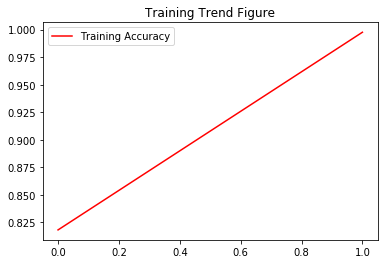

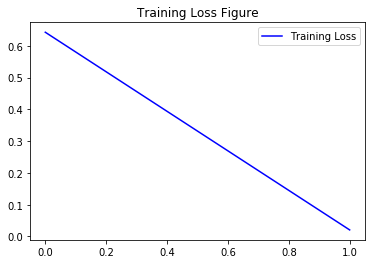

In [57]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.legend()
plt.title('Training Trend Figure')
plt.show()

plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.legend()
plt.title('Training Loss Figure')
plt.show()

## Adding test data in to check unseen scenario

In [26]:
# Recall test data shape
print(df_test.shape)

# Type of it
print(type(df_test))

# Print top 10 data
df_test.head(10)

(7172, 785)
<class 'pandas.core.frame.DataFrame'>


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [27]:
# Assign test labels
test_labels = df_test['label']

In [28]:
print(type(test_labels))
print(test_labels.shape)
print(test_labels[:10])

<class 'pandas.core.series.Series'>
(7172,)
0     6
1     5
2    10
3     0
4     3
5    21
6    10
7    14
8     3
9     7
Name: label, dtype: int64


In [29]:
# Assign test images
test_images = df_test.iloc[:, 1:]

In [30]:
print(type(test_images))
print(test_images.shape)
print(test_images[:10])

<class 'pandas.core.frame.DataFrame'>
(7172, 784)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     149     149     150     150     150     151     151     150     151   
1     126     128     131     132     133     134     135     135     136   
2      85      88      92      96     105     123     135     143     147   
3     203     205     207     206     207     209     210     209     210   
4     188     191     193     195     199     201     202     203     203   
5      72      79      87     101     115     124     131     135     139   
6      93     100     112     118     123     127     131     133     136   
7     177     177     177     177     177     178     179     179     178   
8     191     194     196     198     201     203     204     205     205   
9     171     172     172     173     173     173     173     173     172   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      152  ...       1

In [31]:
# Pandas to Numpy
test_numpy = test_images.to_numpy()

In [32]:
# Normalize the test data
test_normalized = test_numpy / 255.0

In [33]:
# Reshape to 7172 x 28 x 28 x 1
test_normalized_reshaped = test_normalized.reshape(7172, 28, 28, 1)

In [34]:
test_normalized_reshaped.shape

(7172, 28, 28, 1)

In [35]:
test_labels = test_labels .to_numpy()

In [36]:
test_loss = model.evaluate(test_normalized_reshaped, test_labels)

7172/7172 [==============================] - 2s 234us/sample - loss: 0.3317 - accuracy: 0.9151


According to the train and test, we achieved 99% training accuracy, and have test 91% validation accuracy.

In [65]:
classifications = model.predict(test_normalized_reshaped)

12

[5.5229812e-09 3.3030124e-11 1.7900142e-10 4.7734298e-16 1.2600544e-03
 2.8381472e-14 6.9668956e-17 1.0110358e-16 7.3827890e-09 1.0055704e-23
 6.9167110e-18 9.9305150e-17 9.9763489e-01 9.1219431e-04 1.9768619e-10
 3.6976795e-16 1.3525583e-10 2.7556801e-17 1.9286462e-04 2.6478290e-16
 2.0369336e-12 5.5760185e-10 8.8325858e-13 1.5393245e-12 6.2921293e-22
 2.8581249e-27]

[[178 179 181 183 184 183 183 184 185 186 185 184 184 183 185 187 182 179
  179 177 177 177 174 173 172 170 169 166]
 [179 184 185 185 186 187 186 186 187 187 188 188 186 185 174 158 171 185
  179 179 179 177 175 174 174 172 169 167]
 [182 184 185 187 187 188 189 189 188 188 187 173 184 188 135 105  82 160
  191 183 184 181 176 176 175 175 171 169]
 [184 186 187 188 188 188 189 191 188 190 169 118  98 145 147 120  80  89
  170 132 118 157 184 175 175 174 172 170]
 [186 188 188 188 189 192 190 190 188 199 167 133  93  83 164 129 103  76
   74 104  86  61 157 185 177 175 173 171]
 [186 187 189 189 191 191 193 193 190 2

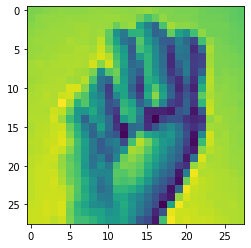

In [67]:
# Play some test data to check
print(test_labels[13])
print("")
print(classifications[13])
print("")

test_numpy_draw = test_numpy.reshape(7172, 28, 28)

print(test_numpy_draw[13])
plt.imshow(test_numpy_draw[13])

4

[1.6240159e-05 2.0216687e-06 1.7366965e-08 3.7945668e-16 9.9997544e-01
 4.3366208e-06 2.3113666e-16 2.2576848e-17 1.0654380e-06 1.5708403e-19
 1.4302071e-18 1.0061781e-15 5.4055283e-07 1.9366786e-08 1.1493793e-10
 3.7170114e-11 2.3974624e-15 3.2174531e-20 8.1351274e-08 2.5078239e-10
 2.1031758e-15 2.7742387e-15 2.5263304e-07 7.1116524e-12 5.9290870e-17
 8.9907437e-23]

[[137 138 141 142 142 144 146 150 150 152 153 154 155 157 159 159 160 161
  163 164 164 164 164 163 165 165 167 168]
 [137 139 141 143 143 146 147 150 152 153 153 154 156 156 158 160 160 162
  163 164 165 165 166 167 167 167 167 168]
 [137 140 142 143 146 147 148 151 151 152 153 155 159 156 154 156 163 162
  163 162 164 166 167 168 168 169 169 169]
 [137 140 144 144 146 146 149 150 153 160 155 145 147 172 160 135 129 165
  161 167 166 165 167 169 169 168 170 170]
 [138 141 144 147 147 146 146 150 153 162 171 153 105 141 168 128  94 116
  139 124 159 169 169 170 170 170 171 171]
 [140 143 144 146 145 148 178 167 145 10

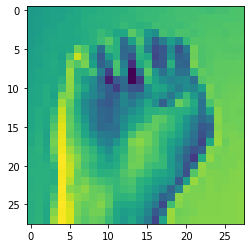

In [69]:
print(test_labels[23])
print("")
print(classifications[23])
print("")

print(test_numpy_draw[23])
plt.imshow(test_numpy_draw[23])

We can successfully predict test images for label '13' and '23' through our built CNN model.